## Кутдусов Руслан 

##### Условие

Дана функция $y = f(x) = \frac{6 \sin{x}}{x} $ . Приблизить функцию  методом интерполяции, используя многочлен Лагранжа. 
Степень многочлена N подобрать таким образом, чтобы максимальная величина погрешности на отрезке $[5, 15]$ не превышала заданной величины $\varepsilon = 10^{-3}$ Построить графики многочленов и графики погрешностей .
Приблизить функцию методом линейного сплайна. Сравнить полученные результаты.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def f(x):
    return 6 * np.sin(x) / x

### Рассмотрим несколько случаев разбиения разным количеством точек

In [3]:
n_1 = 10
x_1 = np.array([5 + i for i in range(n_1 + 1)])
y_1 = np.array([f(x_1[i]) for i in range(n_1 + 1)])
y_1

array([-1.15070913, -0.2794155 ,  0.56313137,  0.74201868,  0.27474566,
       -0.32641267, -0.5454492 , -0.26828646,  0.19392325,  0.42454601,
        0.26011514])

In [4]:
n_2 = 11
x_2 = np.sort(np.r_[[5 + i for i in range(n_2)], 7.35])
y_2 = np.array([f(x_2[i]) for i in range(n_2 + 1)])
y_2

array([-1.15070913, -0.2794155 ,  0.56313137,  0.71482997,  0.74201868,
        0.27474566, -0.32641267, -0.5454492 , -0.26828646,  0.19392325,
        0.42454601,  0.26011514])

In [5]:
n_3 = 12
x_3 = np.sort(np.r_[[5 + i for i in range(n_3 - 1)], 7.35, 10.65])
y_3 = np.array([f(x_3[i]) for i in range(n_3 + 1)])
y_3

array([-1.15070913, -0.2794155 ,  0.56313137,  0.71482997,  0.74201868,
        0.27474566, -0.32641267, -0.53007385, -0.5454492 , -0.26828646,
        0.19392325,  0.42454601,  0.26011514])

In [6]:
def pr(t, i, n, x): # произведение внутри многочлена Лагранжа
    pr = 1
    for k in range(n + 1):
        if i != k:
            pr *= (t - x[k]) / (x[i] - x[k])
    return pr

In [7]:
def L(t, n, x, y): # многочлен Лагранжа
    return sum(y[i] * pr(t, i, n, x) for i in range(n + 1))

In [8]:
def RL(t, n, x, y): # функция погрешности для многочлена Лагранжа
    return abs(f(t) - L(t, n, x, y))

In [9]:
def P(t, n, x, y): # линейный сплайн
    i = 0
    for j in range(n):
        if (t >= x[j]).any() and (t <= x[j + 1]).any():
            i = j
            break
    a_i = y[i]
    b_i = (y[i + 1] - y[i]) / (x[i + 1] - x[i])
    return a_i + b_i * (t - x[i])

In [10]:
#введём дополнительные вектора для удобства изображения линейного сплайна в каждом из случаев 
x_1_ = np.array([5 + 0.5 * i for i in range(2 * n_1 + 1)])
x_2_ = np.array(np.r_[[5 + 0.5 * i for i in range(4)], [7, 7.175, 7.35, 7.675], [8 + 0.5 * i for i in range(15)]])
x_3_ = np.array(np.r_[[5 + 0.5 * i for i in range(4)], [7, 7.175, 7.35, 7.675], [8 + 0.5 * i for i in range(4)], [10, 10.325 ,10.65, 10.825], [11 + 0.5 * i for i in range(9)]])
y_1_ = np.array([P(x_1_[i], n_1, x_1, y_1) for i in range(2 * n_1 + 1)]) 
y_2_ = np.array([P(x_2_[i], n_2, x_2, y_2) for i in range(2 * n_2 + 1)]) 
y_3_ = np.array([P(x_3_[i], n_3, x_3, y_3) for i in range(2 * n_3 + 1)])

In [11]:
def RP(t, n, x, y): # функция погрешности для линейного сплайна
    return np.abs(f(t) - P(t, n, x, y))

In [12]:
z_1_ = np.array([RP(x_1_[i], n_1, x_1, y_1) for i in range(2 * n_1 + 1)]) 
z_2_ = np.array([RP(x_2_[i], n_2, x_2, y_2) for i in range(2 * n_2 + 1)]) 
z_3_ = np.array([RP(x_3_[i], n_3, x_3, y_3) for i in range(2 * n_3 + 1)]) 

### Изобразим графики многочлена, сплайна и графики погрешностей

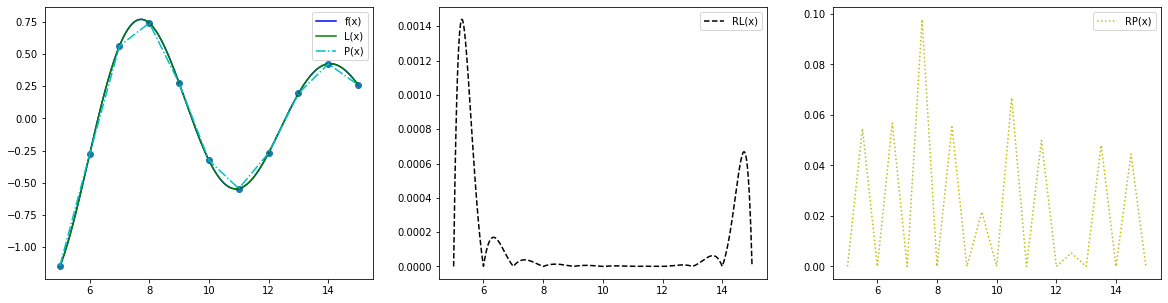

In [13]:
# при n = 10
fig, axs = plt.subplots(1, 3, figsize = (20,5))
z = np.linspace(5, 15, 1000)
axs[0].scatter(x_1, y_1)
axs[0].plot(z, f(z), 'b', label = 'f(x)')
axs[0].plot(z, L(z, n_1, x_1, y_1), 'g', label = 'L(x)')
axs[0].plot(x_1_, y_1_, '-.c', label = 'P(x)')
axs[1].plot(z, RL(z, n_1, x_1, y_1), '--k', label = 'RL(x)')
axs[2].plot(x_1_, z_1_, ':y', label = 'RP(x)')
axs[0].legend()
axs[1].legend()
axs[2].legend()

Максимальная погрешность больше $\varepsilon$ 

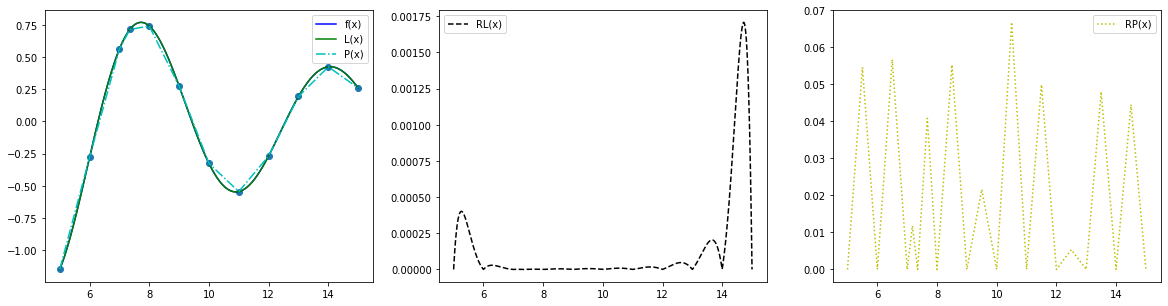

In [14]:
# при n = 11
fig, axs = plt.subplots(1, 3, figsize = (20,5))
axs[0].scatter(x_2, y_2)
axs[0].plot(z, f(z), 'b', label = 'f(x)')
axs[0].plot(z, L(z, n_2, x_2, y_2), 'g', label = 'L(x)')
axs[0].plot(x_2_, y_2_, '-.c', label = 'P(x)')
axs[1].plot(z, RL(z, n_2, x_2, y_2), '--k', label = 'RL(x)')
axs[2].plot(x_2_, z_2_, ':y', label = 'RP(x)')
axs[0].legend()
axs[1].legend()
axs[2].legend()

Максимальная погрешность пока ещё больше $\varepsilon$ 

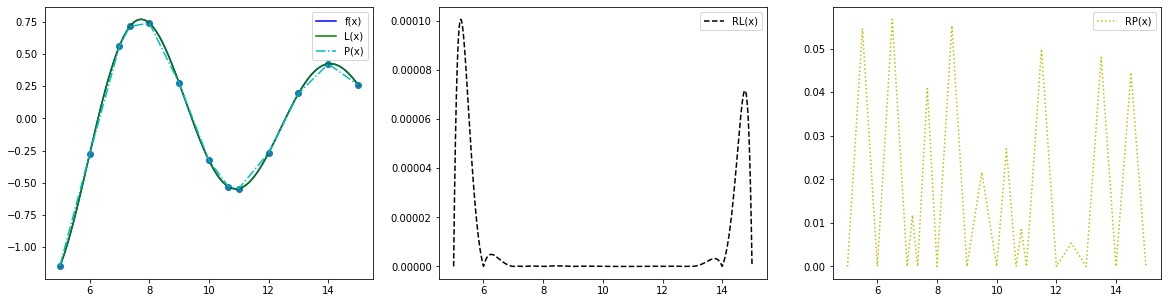

In [15]:
# при n = 12
fig, axs = plt.subplots(1, 3, figsize = (20,5))
axs[0].scatter(x_3, y_3)
axs[0].plot(z, f(z), 'b', label = 'f(x)')
axs[0].plot(z, L(z, n_3, x_3, y_3), 'g', label = 'L(x)')
axs[0].plot(x_3_, y_3_, '-.c', label = 'P(x)')
axs[1].plot(z, RL(z, n_3, x_3, y_3), '--k', label = 'RL(x)')
axs[2].plot(x_3_, z_3_, ':y', label = 'RP(x)')
axs[0].legend()
axs[1].legend()
axs[2].legend()

Как видим, максимальная погрешность стала равной $\varepsilon$. Причиной этому служит увеличение числа n точек разбиения.
Также с увеличением числа n уменьшилась максимальная погрешность линейного сплайна.